(4097, 1201)


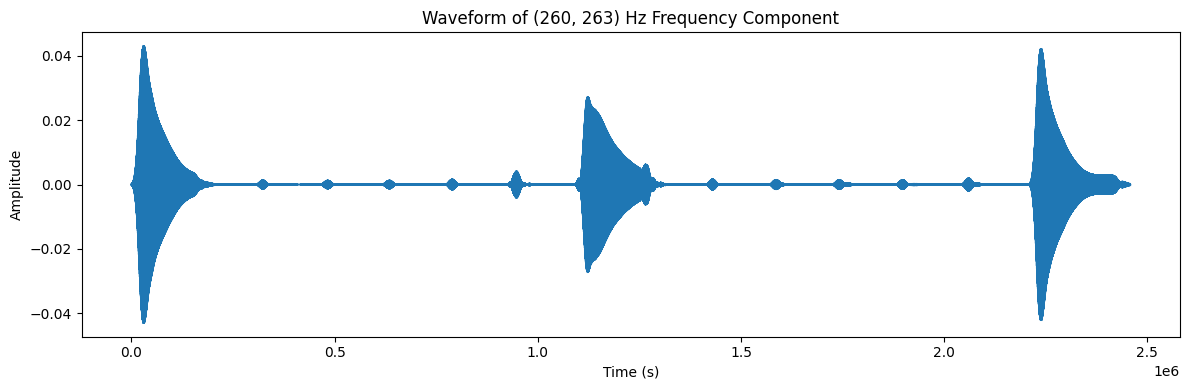

In [3]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

# 設定要載入的音頻檔案路徑
filename = r"C:\Users\garyhu\Desktop\audio.wav"

# 設定要提取的特定頻率範圍
target_frequency = (260, 263)  # 包括中央C的頻率範圍

# 載入音頻檔案
audio, sr = librosa.load(filename, sr=None)

# 執行短時傅立葉變換
stft = np.abs(librosa.stft(audio, hop_length=512, n_fft=2048 * 4))
print(stft.shape)

frequencies = librosa.core.fft_frequencies(n_fft=2048*4)  # 取得頻率陣列

# 將目標頻率範圍之外的頻率分量置零
start_index = np.argmax(frequencies >= target_frequency[0])
end_index = np.argmax(frequencies > target_frequency[1])
stft[:start_index, :] = 0
stft[end_index:, :] = 0

# 執行逆短時傅立葉變換，得到特定頻率的波形
filtered_audio = librosa.istft(stft)

# 繪製提取的波形
plt.figure(figsize=(12, 4))
plt.plot(filtered_audio)  # 繪製提取的波形
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform of {} Hz Frequency Component".format(target_frequency))
plt.tight_layout()
plt.show()


Audio(audio,rate=sr)